In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [53]:
m_e = 0.511 # MeV

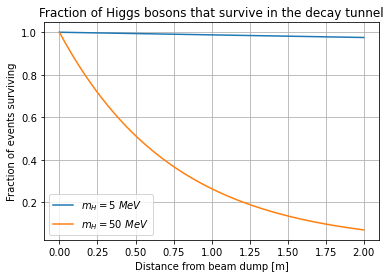

In [4]:
def frac_events(x, x_avg):
    
    return np.exp(-1*x/x_avg)

x = np.linspace(0, 2, 200)
frac = frac_events(x, 80)
frac2 = frac_events(x, 0.75)

plt.plot(x, frac, label=r'$m_{H} = 5~MeV$')
plt.plot(x, frac2, label=r'$m_{H} = 50~MeV$')
plt.xlabel("Distance from beam dump [m]")
plt.ylabel('Fraction of events surviving')
plt.title("Fraction of Higgs bosons that survive in the decay tunnel")
plt.grid(True)
plt.legend()
plt.show()


# Part a and b

If we assume the Higgs is produced right after the beam dump, then we can calculate the fraction of Higgs that survive until the end of the decay tunnel (up to the detection system) in order to estimate the experimental acceptance as a function of the lifetime of the Higgs. The decay equation used is 

$$ \frac{N(x)}{N_0} = e^{\frac{-x}{<x>}}, $$

where $\frac{N(x)}{N_0}$ is the fraction of Higgs that survive at distance x and $<x>$ is the mean distance travelled by a particle with lifetime $\tau$ ($<x>~ = \beta \gamma c\tau$).

In [5]:
masses = np.linspace(1, 50, 50)
taus = 4e-9/masses

def frac_higgs(mass):
    
    tau = 4e-9/mass
    beta_gamma = np.sqrt(1600**2 - mass**2)/mass #p = beta*gamma*m
    avg_x = beta_gamma*3e8*tau
    frac = np.exp(-2/avg_x)
    
    return frac

fracs = frac_higgs(masses)

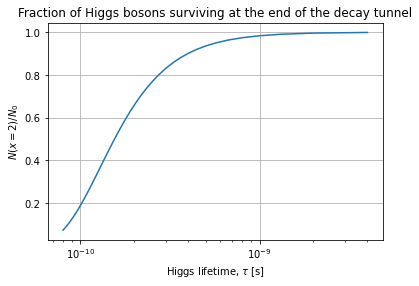

In [6]:
fig, ax = plt.subplots()
ax.semilogx(taus, fracs)
ax.grid()
plt.xlabel(r'Higgs lifetime, $\tau$ [s]')
plt.ylabel(r'$N(x=2)/N_{0}$')
plt.title("Fraction of Higgs bosons surviving at the end of the decay tunnel")

plt.show()

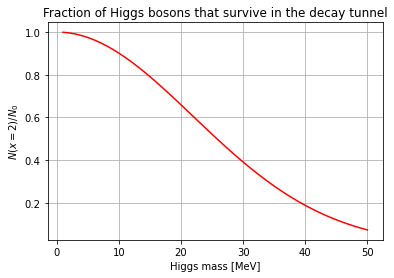

In [7]:
plt.plot(masses, fracs, 'r')
plt.xlabel("Higgs mass [MeV]")
plt.ylabel(r'$N(x=2)/N_{0}$')
plt.title("Fraction of Higgs bosons that survive in the decay tunnel")
plt.grid(True)
plt.show()

# Part c

The number of Higgs bosons that could be produced can be estimated by multiplying the cross section by the number of electrons dumped in the experiment $(2x10^{16})$.

In [42]:
def diff_sigma(screening = False):
    
    Z = 82 # Pb atomic number
    
    if screening == True:
        F = np.log(184*Z**(-1/3))
    if screening == False:
        F = 1/2 # since we assume z = 1
        
    alphaH = m_e**2 * 1.1663787e-5 * 1e-6 * np.sqrt(2)/(4*np.pi)
    diff_sigma = 2*(1/137)**2 * alphaH*Z**2/m_e**2 * F
    
    return diff_sigma

sigma = diff_sigma(False)
N = sigma*2e16
N

9405.053709913474

Now we have $N_0$ so we can simply calculate $N(x = 2)$ as a function of the Higgs mass. 

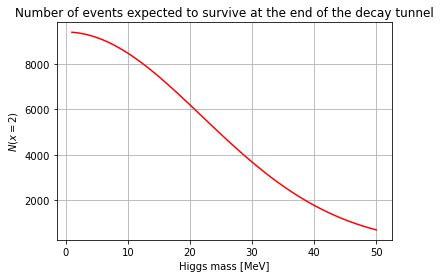

In [41]:
nEvents = frac_higgs(masses)*N
plt.plot(masses, nEvents, 'r')
plt.xlabel("Higgs mass [MeV]")
plt.ylabel(r'$N(x=2)$')
plt.title("Number of events expected to survive at the end of the decay tunnel")
plt.grid(True)
plt.show()

# Part d 


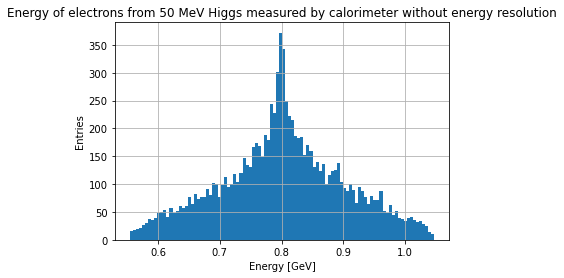

In [11]:
m_e = 0.511
def energy_electron(mH):
    
    gamma = 1600/mH # E = gamma*m
    #beta = np.sqrt(1 - (1/gamma**2))
    beta = np.sqrt(1600**2 - mH**2)/1600 # beta = p/E
    #print(beta)
    E_rest = mH/2
    theta = random.uniform(0, np.pi/10)
    phi = random.uniform(0, np.pi*2)
    # p = np.sqrt(mH**2 - (2*m_e)**2)/2
    p = np.sqrt(E_rest**2 - m_e**2)
    px = p*np.sin(theta)*np.cos(phi)
    #py = p*np.sin(theta)*np.sin(phi)
    pz = p*np.cos(theta)
    #E_rest = np.sqrt(p**2 + m_e**2)
    pz_lab = gamma*pz + E_rest*beta*gamma
    E_lab = gamma*E_rest + px*beta*gamma
    #E_lab = np.sqrt(m_e**2 + (px+pz_lab)**2)
    theta_lab = np.arctan(px/pz_lab)
    return E_lab, theta_lab

#E, px, py, pz = energy_electron(5)
#np.sqrt(E**2 - (px+py+pz)**2)

energy_electron(5)[1]

energy = []
for i in range(10000):
    energy.append(energy_electron(50)[0]/1e3)
    #print(energy[i])
    
plt.hist(energy, bins = 100)
plt.xlabel("Energy [GeV]")
plt.ylabel("Entries")
plt.title("Energy of electrons from 50 MeV Higgs measured by calorimeter without energy resolution")
plt.grid(True)
plt.show()

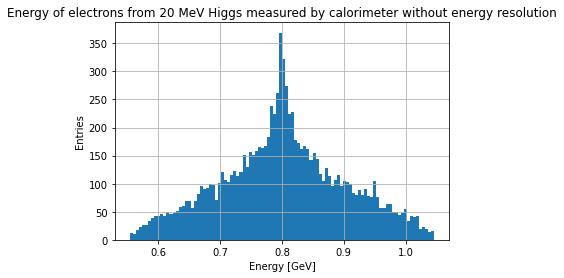

In [13]:
energy = []
for i in range(10000):
    energy.append(energy_electron(20)[0]/1e3)
    #print(energy[i])
    
plt.hist(energy, bins = 100)
plt.xlabel("Energy [GeV]")
plt.ylabel("Entries")
plt.title("Energy of electrons from 20 MeV Higgs measured by calorimeter without energy resolution")
plt.grid(True)
plt.show()

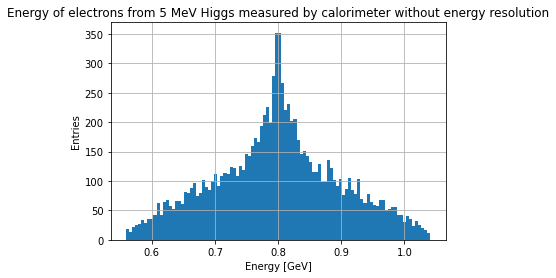

In [14]:
energy = []
for i in range(10000):
    energy.append(energy_electron(5)[0]/1e3)
    #print(energy[i])
    
plt.hist(energy, bins = 100)
plt.xlabel("Energy [GeV]")
plt.ylabel("Entries")
plt.title("Energy of electrons from 5 MeV Higgs measured by calorimeter without energy resolution")
plt.grid(True)
plt.show()

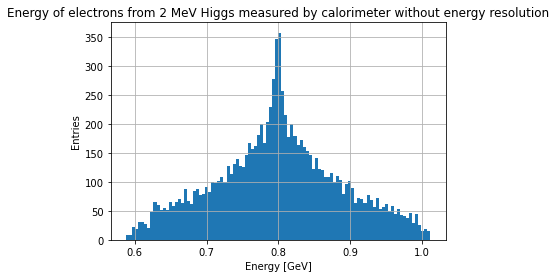

In [15]:
energy = []
for i in range(10000):
    energy.append(energy_electron(2)[0]/1e3)
    #print(energy[i])
    
plt.hist(energy, bins = 100)
plt.xlabel("Energy [GeV]")
plt.ylabel("Entries")
plt.title("Energy of electrons from 2 MeV Higgs measured by calorimeter without energy resolution")
plt.grid(True)
plt.show()

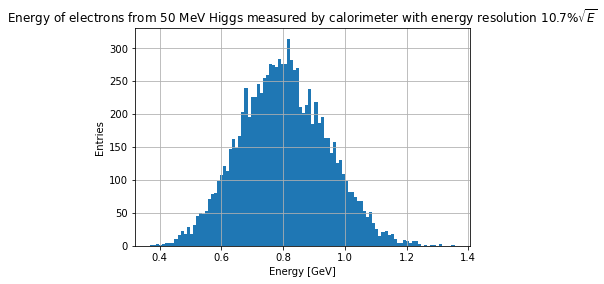

In [16]:
energy = []
for i in range(10000):
    e = energy_electron(50)[0]/1e3
    #print(energy[i])
    energy.append(np.random.normal(e, 0.107*np.sqrt(e)))
    
plt.hist(energy, bins = 100)
plt.xlabel("Energy [GeV]")
plt.ylabel("Entries")
plt.title(r'Energy of electrons from 50 MeV Higgs measured by calorimeter with energy resolution 10.7%$\sqrt{E}$')
plt.grid(True)
plt.show()

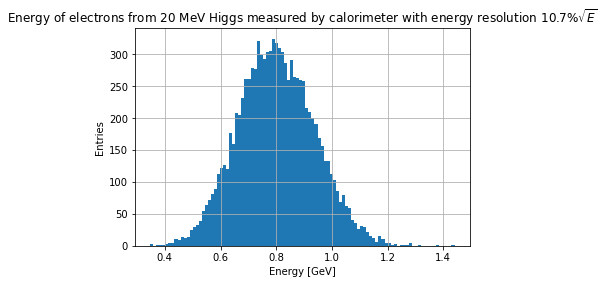

In [17]:
energy = []
for i in range(10000):
    e = energy_electron(20)[0]/1e3
    #print(energy[i])
    energy.append(np.random.normal(e, 0.107*np.sqrt(e)))
    
plt.hist(energy, bins = 100)
plt.xlabel("Energy [GeV]")
plt.ylabel("Entries")
plt.title(r'Energy of electrons from 20 MeV Higgs measured by calorimeter with energy resolution 10.7%$\sqrt{E}$')
plt.grid(True)
plt.show()

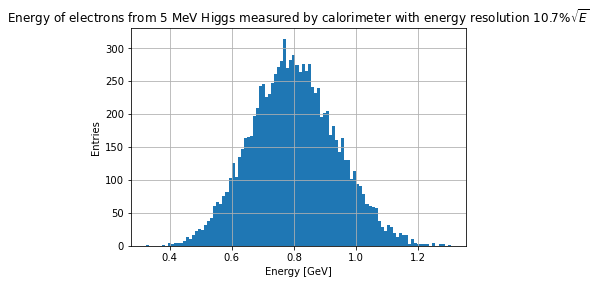

In [18]:
energy = []
for i in range(10000):
    e = energy_electron(5)[0]/1e3
    #print(energy[i])
    energy.append(np.random.normal(e, 0.107*np.sqrt(e)))
    
plt.hist(energy, bins = 100)
plt.xlabel("Energy [GeV]")
plt.ylabel("Entries")
plt.title(r'Energy of electrons from 5 MeV Higgs measured by calorimeter with energy resolution 10.7%$\sqrt{E}$')
plt.grid(True)
plt.show()

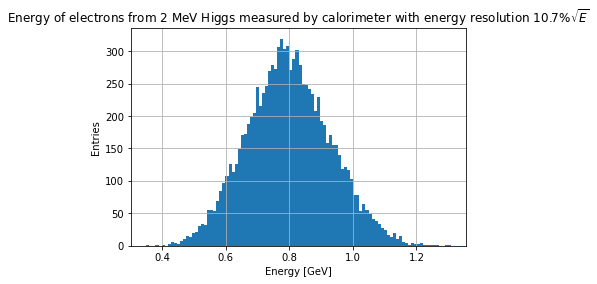

In [23]:
energy = []
for i in range(10000):
    e = energy_electron(2)[0]/1e3
    #print(energy[i])
    energy.append(np.random.normal(e, 0.107*np.sqrt(e)))
    
plt.hist(energy, bins = 100)
plt.xlabel("Energy [GeV]")
plt.ylabel("Entries")
plt.title(r'Energy of electrons from 2 MeV Higgs measured by calorimeter with energy resolution 10.7%$\sqrt{E}$')
plt.grid(True)
plt.show()

# Part e

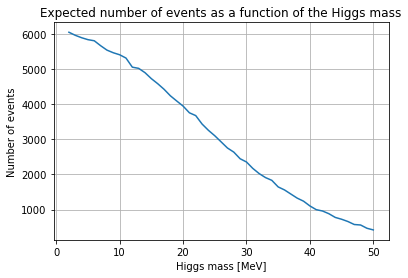

422


In [52]:
nEvents = []
for m in range(1, 50):
    energy = []
    n = frac_higgs(m+1)*N
    for i in range(int(n)):
        e = energy_electron(m+1)[0]/1e3
        #print(energy[i])
        e2 = np.random.normal(e, 0.107*np.sqrt(e))
        if e2 > 0.75: energy.append(e2)
    nEvents.append(len(energy))        
               
mass = np.linspace(2, 50, 49)
    
plt.plot(mass, nEvents)
plt.xlabel("Higgs mass [MeV]")
plt.ylabel("Number of events")
plt.title(r'Expected number of events as a function of the Higgs mass')
plt.grid(True)
plt.show()
print(len(energy))